# 前言
卷积神经网络（Convolutional Neural Networks, CNNs）是一种特殊类型的神经网络，在图像和视频识别、推荐系统、图像分类、医学图像分析、自然语言处理等领域有着广泛的应用。它们能够自动从原始图像中提取特征，并通过多层网络结构学习这些特征的高级表示。本文通过手写数字识别项目带大家学习卷积神经网络。

# 卷积神经网络基本概念

## CNN结构
输入层（Input Layer）--> {卷积层（Convolutional Layer） --> 池化层（Pooling Layer）--> 卷积层（Convolutional Layer） --> 池化层（Pooling Layer）}(重复) --> 全连接层（Fully Connected Layer）

## 卷积层
在深度学习和计算机视觉中，尤其是在处理卷积神经网络（CNN）时，计算输出尺寸（Output Size）的公式非常重要。您给出的公式是卷积层输出尺寸计算的一个基本公式，但通常我们会用更直观的符号来表示它。下面是该公式转换为常用表示方法的形式：

$$ O = \left\lfloor \frac{I + 2P - K}{S} \right\rfloor + 1 $$

其中：
- $O$ 代表输出尺寸（Output Size），通常是输出特征图的高度或宽度（假设它们是相等的，即正方形特征图）。
- $I$ 代表输入尺寸（Input Size），即输入特征图的高度或宽度。
- $P$ 代表填充（Padding）的大小，即在输入特征图的边界上添加的零的层数。注意，这里的 $2P$ 表示在输入特征图的两侧（或上下两侧，取决于维度）都添加了 $P$ 层的零。
- $K$ 代表卷积核（Kernel Size）的大小，即卷积核的高度或宽度（在正方形卷积核的情况下）。
- $S$ 代表步长（Stride），即卷积核在输入特征图上移动的步数。
- $\left\lfloor \cdot \right\rfloor$ 表示向下取整操作，因为像素数必须是整数。

这个公式适用于计算卷积层（包括标准卷积层和转置卷积层，但转置卷积层有额外的参数和复杂性）后的输出特征图尺寸。在实际应用中，了解如何根据这些参数调整网络结构以得到期望的输出尺寸是非常重要的。

## 激活函数（Activation Function）
激活函数用于在卷积层（以及其他类型的神经网络层）之后引入非线性。常见的激活函数包括ReLU（Rectified Linear Unit，修正线性单元）、sigmoid和tanh等。ReLU因其简单性和减少梯度消失问题的能力而在CNN中广泛使用。

## 池化层
池化层（Pooling Layer）在卷积神经网络（CNN）中扮演着重要的角色，主要用于特征融合和降维，以减少计算量和控制过拟合。池化层的输入尺寸和输出尺寸计算公式可以根据不同的参数设置而有所不同，但基本思路是相似的。

### 池化层的输出尺寸计算公式

池化层的输出尺寸计算公式可以表示为：

$$ O = \left\lfloor \frac{I + 2P - F}{S} + 1 \right\rfloor $$

其中：

- $O$ 代表输出尺寸（Output Size），即池化层输出的特征图的高度和宽度。
- $I$ 代表输入尺寸（Input Size），即输入特征图的高度和宽度。
- $F$ 是池化窗口（Pooling Window）的大小，即池化操作覆盖的输入特征图的区域大小。
- $S$ 是步长（Stride），即池化窗口在输入特征图上移动的步数。
- $P$ 是填充（Padding），即在输入特征图的边界上添加的零的层数，用于控制输出尺寸。
- $\left\lfloor \cdot \right\rfloor$ 表示向下取整操作，因为像素数必须是整数。

### 注意事项

- 池化层通常不涉及权重和偏置参数，因此它们不会影响模型的学习能力，但对于减少计算量和控制过拟合非常有帮助。
- 在实际应用中，池化窗口的大小$F$和步长$S$通常设置为相同的值，如2或3，这样可以更有效地降低特征图的维度。
- 填充$P$的值可以是0（无填充），也可以是其他正整数（有填充），具体取决于需要保持输出特征图尺寸与输入特征图尺寸的比例关系。

## 全连接层（Fully Connected Layer, FC Layer）
在CNN的末端，通常会有几个全连接层。这些层中的每个神经元都与前一层的所有神经元相连接。全连接层的作用是将前面层学到的“分布式特征表示”映射到样本标记空间。在分类任务中，全连接层的输出可以传递给softmax函数来生成最终的类别概率分布。

## 参数共享（Parameter Sharing）
在CNN中，卷积核的参数是在整个输入数据上共享的。这意味着无论数据中的哪个位置，卷积核都使用相同的权重和偏置参数进行卷积操作。这种参数共享机制减少了模型的参数量，并有助于模型学习到输入数据的空间层次结构。

## 局部连接（Local Connectivity）
在卷积层中，每个神经元仅与输入数据的一个局部区域（即感受野）相连接，而不是与整个输入数据相连接。这种局部连接机制使得CNN能够学习到数据的局部特征，这与人类视觉系统的处理机制相似。

## 反向传播（Backpropagation）
反向传播算法是训练CNN（以及其他类型的神经网络）的关键算法。在训练过程中，通过计算损失函数关于网络参数的梯度，并利用梯度下降（或其变体）来更新网络参数，以最小化损失函数。反向传播算法通过链式法则在网络的每一层中传播梯度信息。

# MNIST数据集介绍

在探索机器学习领域的广阔天地时，手写数字识别作为一个经典且基础的任务，始终占据着重要的地位。而MNIST（Modified National Institute of Standards and Technology）数据集，正是这一任务中最常用、最经典的数据集之一。本文将首先介绍MNIST数据集，为后续的手写数字识别模型训练与测试打下坚实的基础。

## MNIST数据集概述

MNIST数据集由Yann LeCun等人搜集整理，是一个大型的手写体数字数据库。该数据集最初来源于NIST（National Institute of Standards and Technology）的两个数据库：专用数据库1（Special Database 1）和特殊数据库3（Special Database 3）。通过精心筛选与预处理，MNIST最终成为了一个包含大量手写数字图像的标准数据集，广泛应用于各种图像处理系统和机器学习算法的训练与测试中。

## 数据集的构成

MNIST数据集由60,000个训练样本和10,000个测试样本组成，每个样本都是一张`28x28`像素的灰度图像，表示一个手写数字（0-9）。这些图像均已被归一化，像素值范围在0到255之间，其中`0`代表黑色，`255`代表白色。数据集的图像由来自不同人群的手写体构成，包括高中生和美国人口普查局的工作人员，确保了数据的多样性和代表性。

## 数据集的特点

1. **简单性**：虽然MNIST数据集包含的手写数字种类繁多，但由于其图像尺寸小（28x28像素）、像素深度低（灰度图像），使得处理起来相对简单。这使其成为机器学习初学者练习图像识别、模式识别等任务的理想选择。

2. **代表性**：MNIST数据集中的手写数字覆盖了各种书写风格和变体，使得训练出的模型能够较好地泛化到未知的手写数字上。因此，该数据集在评估机器学习算法性能时具有很高的参考价值。

3. **广泛应用**：由于其简单性和代表性，MNIST数据集在机器学习领域得到了广泛应用。从简单的神经网络到复杂的深度学习模型，几乎所有的图像识别算法都会使用MNIST数据集进行训练和测试。

## 数据集的下载与使用

MNIST数据集可以通过多种途径下载，其中最常用的方式是通过互联网直接下载。用户可以从Yann LeCun的官方网站（http://yann.lecun.com/exdb/mnist/）或其他数据共享平台获取该数据集。下载后的数据集通常包含四个文件：训练集图像、训练集标签、测试集图像和测试集标签。这些文件均为压缩格式，用户需要解压后才能使用。

在使用MNIST数据集时，用户需要根据自己的需求进行预处理和加载操作。例如，可以使用Python的NumPy库或Pandas库来读取和处理数据集中的图像和标签信息；也可以使用深度学习框架（如TensorFlow、PyTorch等）中提供的数据加载工具来简化这一过程。

# 下载并导入数据集

In [ ]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

# 数据预处理
# 使用Compose组合多个变换，这里将数据转换为张量并进行标准化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载MNIST数据集并划分为训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


查看训练集属性：

In [6]:
# 查看整个训练集的样本数量及单个样本的形状
print(f"训练集大小: {len(train_dataset)}")
# 查看第一个样本的数据和标签
first_sample, first_label = train_dataset[0]
print(f"首个样本数据形状: {first_sample.shape}")
print(f"首个样本标签: {first_label}")

# 如果想查看前几个样本的具体数据内容，可以通过循环实现
for i in range(5):
    data, label = train_dataset[i]
    print(f"样本 {i+1} 的数据:\n{data}\n标签: {label}\n")

训练集大小: 60000
首个样本数据形状: torch.Size([1, 28, 28])
首个样本标签: 5
样本 1 的数据:
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,

展示训练集中的第一幅图片：

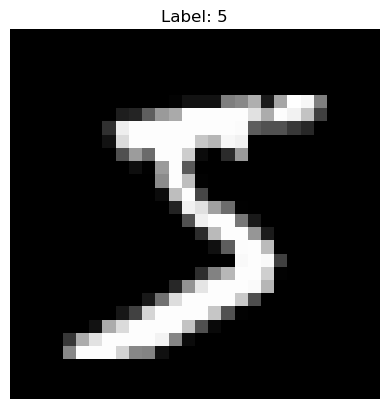

In [7]:
import matplotlib.pyplot as plt

# 获取第一个样本的数据和标签
first_image, first_label = train_dataset[0]

# 将图像数据从形状 (1, 28, 28) 转换为 (28, 28)，以便显示
first_image = first_image.squeeze().numpy()  # 去除通道维度，并转换为numpy数组

# 显示图像
plt.imshow(first_image, cmap='gray')  # 使用灰度色阶显示图像
plt.title(f'Label: {first_label}')  # 显示图像标签作为标题
plt.axis('off')  # 不显示坐标轴
plt.show()

In [10]:
# 获取第一个样本的数据
first_image, _ = train_dataset[0]

# 将张量转换为numpy数组以便打印
first_image_np = first_image.numpy()

# 打印原始的三维数组（包含通道维度）
print("原始图像数据（包含通道维度）:")
print(first_image_np)


原始图像数据（包含通道维度）:
[[[-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         

In [11]:

# 如果你想去掉通道维度，打印二维矩阵
first_image_2d = first_image_np.squeeze()  # 去掉通道维度
print("\n去掉通道后的二维矩阵:")
print(first_image_2d)


去掉通道后的二维矩阵:
[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1. 

# 定义模型、优化器、损失函数

进行2次卷积和2次池化，得到64*7*17，再进行2次全连接，得到10个输出。

In [12]:
# 定义批次大小
batch_size = 64
# 使用DataLoader加载数据，以便在训练过程中更方便地迭代数据
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 定义模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 初始化卷积层、池化层、全连接层和dropout层
        # 定义第一个卷积层，用于提取特征
        # 输入通道数为1（适用于灰度图像），输出通道数为32，卷积核大小为5x5，步长为1，padding为2
        # 第一次卷积后生成的特征图大小为32*28*28
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        
        # 定义最大池化层，用于降低特征维度，减少计算量
        # 池化窗口大小为2x2，步长为2，无padding
        # 第一次池化后生成的特征图大小为32*14*14
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # 定义第二个卷积层，进一步提取和整合特征
        # 输入通道数为32，输出通道数为64，卷积核大小为5x5，步长为1，padding为2
        # 第二次卷积后生成的特征图大小为64*14*14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        
        # 定义第一个全连接层，用于分类前的特征转换
        # 输入大小为64*7*7（这里的尺寸为64*7*7是因为在前向传播时对第二次卷积进行了池化操作），输出大小为1024
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)
        
        # 定义第二个全连接层，用于最终的分类输出
        # 输入大小为1024，输出大小为10（假设分类任务有10个类别）
        self.fc2 = nn.Linear(1024, 10)

        # 定义Dropout层，用于训练过程中的正则化，防止过拟合
        # Dropout比例为0.5，即在训练过程中随机将50%的元素置为0
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # 定义前向传播过程
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 实例化模型
model = Net()

# 定义优化器
# 使用Adam优化器更新模型参数
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 定义损失函数
# 使用交叉熵损失函数进行分类任务
criterion = nn.CrossEntropyLoss()

# 训练模型

In [15]:
# 将模型转移到GPU设备上（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 定义训练轮数
num_epochs = 10
# 开始训练过程
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 将数据转移到GPU设备上（如果可用）
        images, labels = images.to(device), labels.to(device)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印损失信息
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# 保存模型参数到文件
torch.save(model.state_dict(), 'model.pth')

Epoch [1/10], Step [100/938], Loss: 0.0037
Epoch [1/10], Step [200/938], Loss: 0.0029
Epoch [1/10], Step [300/938], Loss: 0.0022
Epoch [1/10], Step [400/938], Loss: 0.0651
Epoch [1/10], Step [500/938], Loss: 0.0038
Epoch [1/10], Step [600/938], Loss: 0.0022
Epoch [1/10], Step [700/938], Loss: 0.0079
Epoch [1/10], Step [800/938], Loss: 0.0019
Epoch [1/10], Step [900/938], Loss: 0.0016
Epoch [2/10], Step [100/938], Loss: 0.0016
Epoch [2/10], Step [200/938], Loss: 0.0102
Epoch [2/10], Step [300/938], Loss: 0.0341
Epoch [2/10], Step [400/938], Loss: 0.0060
Epoch [2/10], Step [500/938], Loss: 0.0257
Epoch [2/10], Step [600/938], Loss: 0.0013
Epoch [2/10], Step [700/938], Loss: 0.0767
Epoch [2/10], Step [800/938], Loss: 0.0018
Epoch [2/10], Step [900/938], Loss: 0.0343
Epoch [3/10], Step [100/938], Loss: 0.0063
Epoch [3/10], Step [200/938], Loss: 0.0096
Epoch [3/10], Step [300/938], Loss: 0.0007
Epoch [3/10], Step [400/938], Loss: 0.0002
Epoch [3/10], Step [500/938], Loss: 0.0124
Epoch [3/10

# 评估模型

In [17]:
# 实例化一个与原模型结构相同的模型
model = Net().to(device)  # 确保模型被放置在正确的设备上

# 加载模型参数
model.load_state_dict(torch.load('model.pth', map_location=device, weights_only=True))

# 将模型设置为评估模式
model.eval()
# 禁用梯度计算以减少内存消耗
with torch.no_grad():
    correct = 0
    total = 0
    # 在测试集上进行预测
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 打印测试集上的准确率
    print(f'Test Accuracy of the model on the {total} test images: {100 * correct / total}%')

Test Accuracy of the model on the 10000 test images: 99.29%


完整代码如下：

In [3]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

# 数据预处理
# 使用Compose组合多个变换，这里将数据转换为张量并进行标准化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载MNIST数据集并划分为训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 定义批次大小
batch_size = 64
# 使用DataLoader加载数据，以便在训练过程中更方便地迭代数据
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 定义模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 初始化卷积层、池化层、全连接层和dropout层
        # 定义第一个卷积层，用于提取特征
        # 输入通道数为1（适用于灰度图像），输出通道数为32，卷积核大小为5x5，步长为1，padding为2
        # 第一次卷积后生成的特征图大小为32*28*28
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        
        # 定义最大池化层，用于降低特征维度，减少计算量
        # 池化窗口大小为2x2，步长为2，无padding
        # 第一次池化后生成的特征图大小为32*14*14
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # 定义第二个卷积层，进一步提取和整合特征
        # 输入通道数为32，输出通道数为64，卷积核大小为5x5，步长为1，padding为2
        # 第二次卷积后生成的特征图大小为64*14*14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        
        # 定义第一个全连接层，用于分类前的特征转换
        # 输入大小为64*7*7（这里的尺寸为64*7*7是因为在前向传播时对第二次卷积进行了池化操作），输出大小为1024
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)
        
        # 定义第二个全连接层，用于最终的分类输出
        # 输入大小为1024，输出大小为10（假设分类任务有10个类别）
        self.fc2 = nn.Linear(1024, 10)

        # 定义Dropout层，用于训练过程中的正则化，防止过拟合
        # Dropout比例为0.5，即在训练过程中随机将50%的元素置为0
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # 定义前向传播过程
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 实例化模型
model = Net()

# 定义优化器
# 使用Adam优化器更新模型参数
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 定义损失函数
# 使用交叉熵损失函数进行分类任务
criterion = nn.CrossEntropyLoss()

# 训练模型
# 将模型转移到GPU设备上（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 定义训练轮数
num_epochs = 10
# 开始训练过程
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 将数据转移到GPU设备上（如果可用）
        images, labels = images.to(device), labels.to(device)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印损失信息
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# 评估模型
# 将模型设置为评估模式
model.eval()
# 禁用梯度计算以减少内存消耗
with torch.no_grad():
    correct = 0
    total = 0
    # 在测试集上进行预测
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 打印测试集上的准确率
    print(f'Test Accuracy of the model on the {total} test images: {100 * correct / total}%')

Epoch [1/10], Step [100/938], Loss: 0.4558
Epoch [1/10], Step [200/938], Loss: 0.3089
Epoch [1/10], Step [300/938], Loss: 0.4072
Epoch [1/10], Step [400/938], Loss: 0.1963
Epoch [1/10], Step [500/938], Loss: 0.2640
Epoch [1/10], Step [600/938], Loss: 0.1569
Epoch [1/10], Step [700/938], Loss: 0.1021
Epoch [1/10], Step [800/938], Loss: 0.1734
Epoch [1/10], Step [900/938], Loss: 0.0430
Epoch [2/10], Step [100/938], Loss: 0.0690
Epoch [2/10], Step [200/938], Loss: 0.1784
Epoch [2/10], Step [300/938], Loss: 0.1161
Epoch [2/10], Step [400/938], Loss: 0.0941
Epoch [2/10], Step [500/938], Loss: 0.0507
Epoch [2/10], Step [600/938], Loss: 0.0282
Epoch [2/10], Step [700/938], Loss: 0.0454
Epoch [2/10], Step [800/938], Loss: 0.1383
Epoch [2/10], Step [900/938], Loss: 0.0646
Epoch [3/10], Step [100/938], Loss: 0.0286
Epoch [3/10], Step [200/938], Loss: 0.0890
Epoch [3/10], Step [300/938], Loss: 0.0760
Epoch [3/10], Step [400/938], Loss: 0.2087
Epoch [3/10], Step [500/938], Loss: 0.0563
Epoch [3/10